In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='whitegrid',
        palette='muted',
        font_scale=1.5)
mpl.rcParams['figure.dpi'] = 400
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Part 1 - Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df = pd.read_json('logins.json')
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
df.shape

(93142, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.isnull().sum()

login_time    0
dtype: int64

In [6]:
df.describe(datetime_is_numeric=False)

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
df.sort_values(by='login_time').head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [8]:
login_count_df = (df.resample('15min', on='login_time').count()
                     .rename(columns={'login_time':'login_count'})
                     .reset_index())
login_count_df.head(10)

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


In [9]:
login_count_df.isnull().sum()

login_time     0
login_count    0
dtype: int64

In [10]:
login_count_df.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


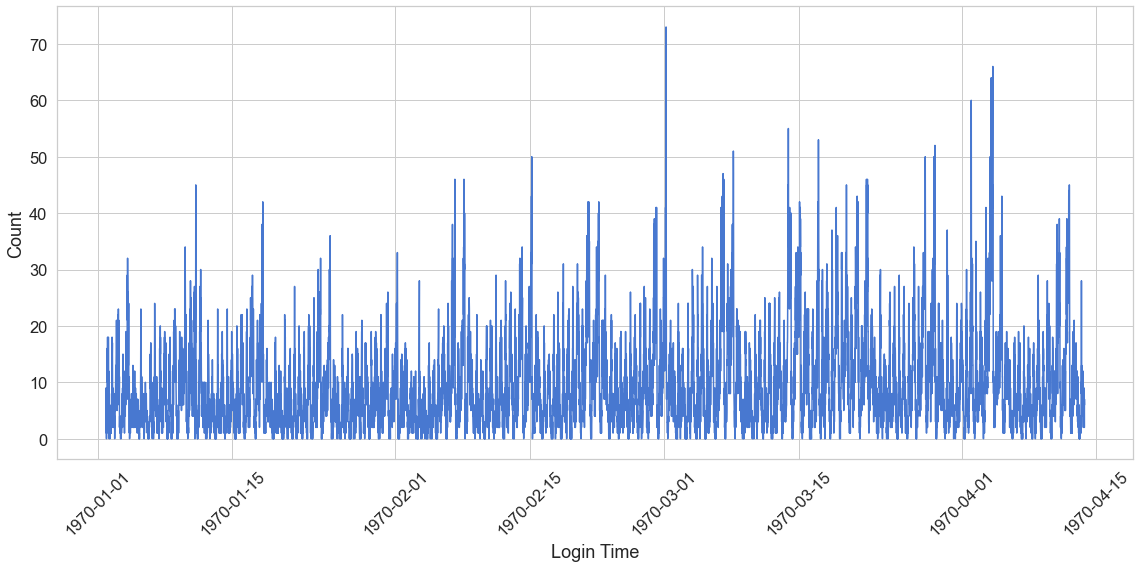

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='login_time', 
             y='login_count', 
             data=login_count_df)
plt.xticks(rotation=45)
plt.xlabel('Login Time')
plt.ylabel('Count')
plt.tight_layout()

In [12]:
num_to_days_dict = {0:'Mon',
                   1:'Tue',
                   2:'Wed',
                   3:'Thu',
                   4:'Fri',
                   5:'Sat',
                   6:'Sun'}
login_count_df['day_of_week'] = login_count_df['login_time'].dt.dayofweek.map(num_to_days_dict)
login_count_df['time_of_day'] = login_count_df['login_time'].dt.strftime("%H:%M")

login_count_df.head()

,login_time,login_count,day_of_week,time_of_day
0,1970-01-01 20:00:00,2,Thu,20:00
1,1970-01-01 20:15:00,6,Thu,20:15
2,1970-01-01 20:30:00,9,Thu,20:30
3,1970-01-01 20:45:00,7,Thu,20:45
4,1970-01-01 21:00:00,1,Thu,21:00


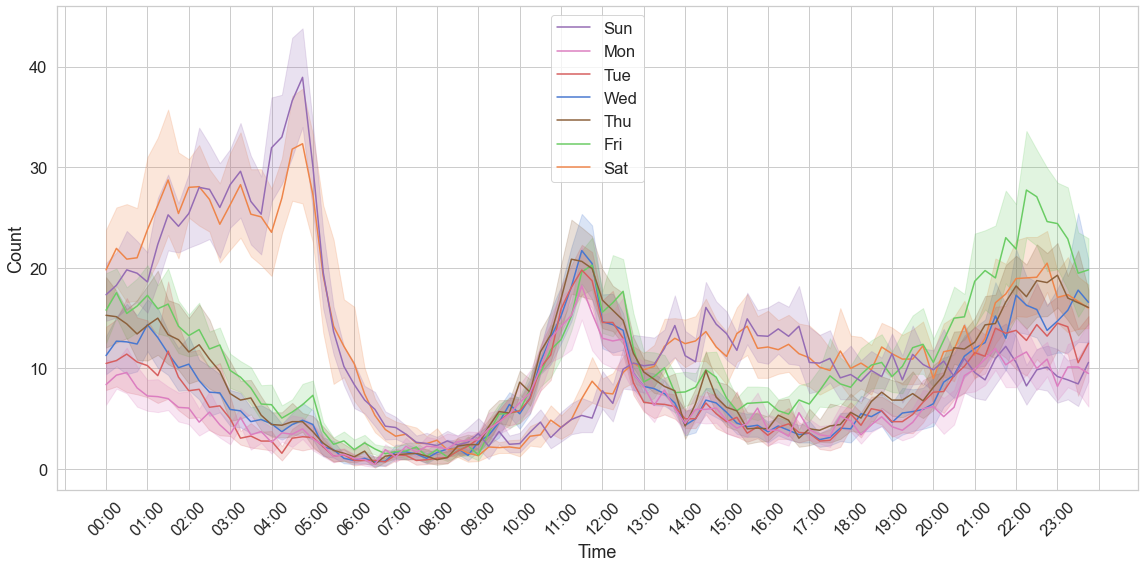

In [13]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 8))
sns.lineplot(x='time_of_day', 
             y='login_count', 
             hue='day_of_week', 
             data=login_count_df.sort_values(by='time_of_day'))
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks( rotation=45)
axs = plt.axes()
axs.xaxis.set_major_locator(ticker.MultipleLocator(4))

handles, labels = axs.get_legend_handles_labels()

handles = [handles[[i for i, day in list(enumerate(labels)) if day=='Sun'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Mon'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Tue'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Wed'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Thu'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Fri'][0]], 
           handles[[i for i, day in list(enumerate(labels)) if day=='Sat'][0]]]
labels = [labels[[i for i, day in list(enumerate(labels)) if day=='Sun'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Mon'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Tue'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Wed'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Thu'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Fri'][0]], 
          labels[[i for i, day in list(enumerate(labels)) if day=='Sat'][0]]]

axs.legend(handles, labels, loc='upper center')

plt.tight_layout()

### Decomposition: Observed, Trend, Seasonality, Noise

In [14]:
y = login_count_df.set_index('login_time')['login_count']
y

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Name: login_count, Length: 9788, dtype: int64

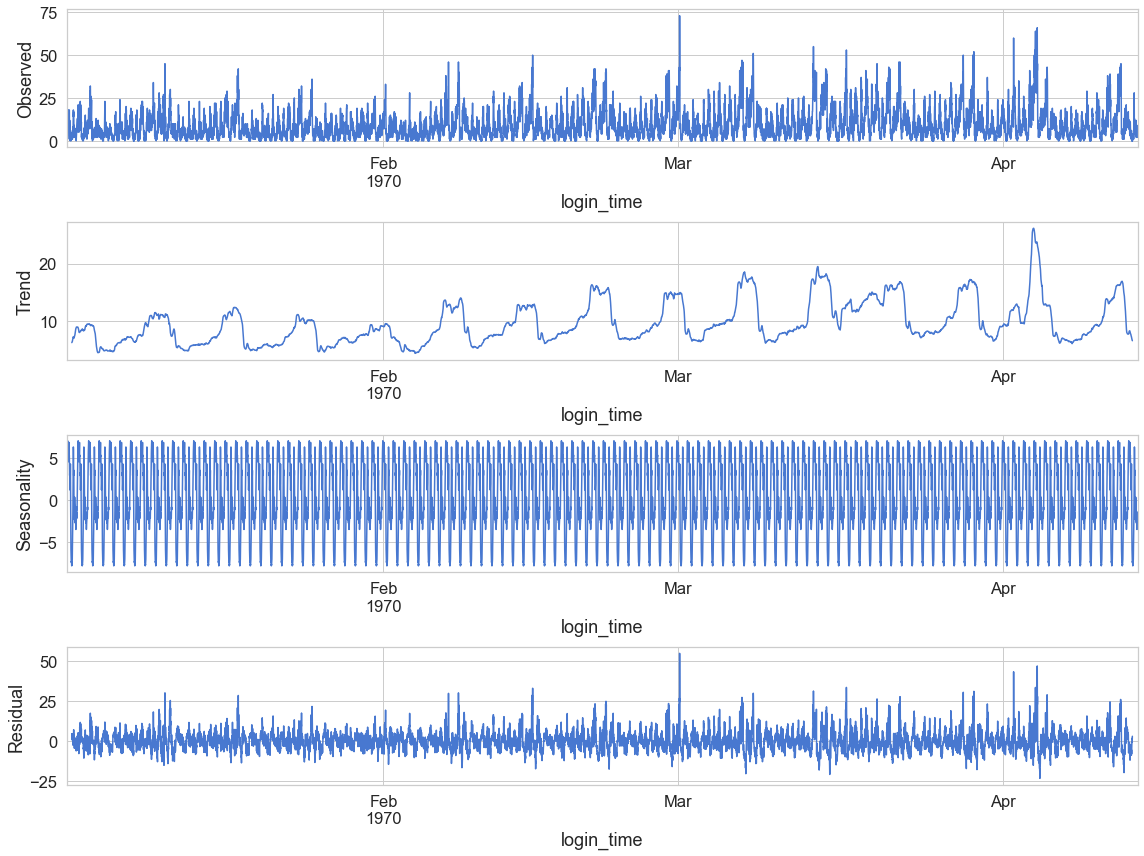

In [15]:
import statsmodels.api as sm

period = decompfreq = 24*60//15
dec = sm.tsa.seasonal_decompose(y,
                                period=period,
                                model='additive')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(16, 12))
dec.observed.plot(ax=ax0)
dec.trend.plot(ax=ax1)
dec.seasonal.plot(ax=ax2)
dec.resid.plot(ax=ax3)
ax0.set_ylabel('Observed')
ax1.set_ylabel('Trend')
ax2.set_ylabel('Seasonality')
ax3.set_ylabel('Residual')
plt.tight_layout()

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both         cities, and why would you choose this metric?

The key metric of success is a statistically significant increase in the number of inter-city rides when the toll-free policy is in place compared to the previous situation, where the two-way toll was active.  

#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I would design an A/B test where toll reimbursement is offered to the Treatment Group (Group A) and there is no change in the toll policy for the Control Group (Group B). 

I would then perform a t-test or a permutation test to measure if there is a significant difference among the groups, with the null hypothesis being there is no difference before and after the policy change, and the null being there is an increase in the inter-city rides for group A. We will reject the null hypothesis if the difference in the means for the two groups has a p-value less than 0.05.

In case we are confident about rejecting the null hypothesis, due to a significant p-value, we would need to proceed to quantifying the financial impact of the new policy on the company's revenue. Therefore, we would need to evaluate the profit generated by Group A, which has higher revenue because of the increased number of inter-city rides but also increased expenses due to the reimbursement of the toll fee, and compare it with the profit generated by Group B, for which the policy has not changed. In case of positive results, the new policy can be extended to more drivers if not all. This could be done in gradually in order to keep track of the total profit evolution over time.

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset
of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

  1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided 
  data for this analysis (a few sentences/plots describing your approach will suffice). What
  fraction of the observed users were retained?
  2. Build a predictive model to help Ultimate determine whether or not a user will be active 
  in their 6th month on the system. Discuss why you chose your approach, what
  alternatives you considered, and any concerns you have. How valid is your model?
  Include any key indicators of model performance.
  3. Briefly discuss how Ultimate might leverage the insights gained from the model to
  improve its longterm rider retention (again, a few sentences will suffice).
  
### Data description
  - `city`: city this user signed up in
  - `phone`: primary device for this user
  - `signup_date`: date of account registration; in the form ‘YYYY MM DD’
  - `last_trip_date`: the last time this user completed a trip; in the form ‘YYYY MM DD’
  - `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
  - `avg_rating_by_driver`: the rider’s average rating over all of their trips
  - `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
  - `surge_pct`: the percent of trips taken with surge multiplier > 1
  - `avg_surge`: The average surge multiplier over all of this user’s trips
  - `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up
  - `ultimate_black_user`: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
  - `weekday_pct`: the percent of the user’s trips occurring during a weekday

In [16]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df.shape

(50000, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data Wrangling

In [19]:
summary_null_df = pd.DataFrame([df.isnull().sum(), df.isnull().sum()/df.shape[0]]).T
summary_null_df.columns = ['null_count', 'null_fraction']
summary_null_df

,null_count,null_fraction
city,0.0,0.00000
trips_in_first_30_days,0.0,0.00000
signup_date,0.0,0.00000
avg_rating_of_driver,8122.0,0.16244
avg_surge,0.0,0.00000
last_trip_date,0.0,0.00000
phone,396.0,0.00792
surge_pct,0.0,0.00000
ultimate_black_user,0.0,0.00000
weekday_pct,0.0,0.00000


avg_rating_of_driver has 16% null values, phone and avg_rating_by_driver have <1% nulls. I will impute these in the pipeline later.

In [20]:
# Duplicates?

In [21]:
df.duplicated().sum()

8

In [22]:
df[df.duplicated(keep=False)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
332,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
3134,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0
5958,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
7836,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
10624,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
14990,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
26709,Winterfell,1,2014-01-01,NaN,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0


In [23]:
df.drop_duplicates(keep='first', inplace=True)

In [24]:
df['signup_date'] = pd.to_datetime(df['signup_date'], infer_datetime_format=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], infer_datetime_format=True)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    41873 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49596 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49791 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [26]:
df['retained'] = (df['last_trip_date'] >= pd.to_datetime('2014-06-01')).astype('int')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [27]:
retained_frac = round(df['retained'].mean()*100, 2)
print('{} % of riders was retained.'.format(retained_frac))

37.61 % of riders was retained.


In [28]:
# let's drop 'last_trip_date' to avoid data leakage
df.drop('last_trip_date', axis=1, inplace=True)

In [29]:
df.retained.isnull().sum()

0

### Numerical Columns

In [30]:
num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]', 'bool']).columns.tolist()
num_col.pop(-1)
num_col

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [31]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,49992.0,2.278405,3.792953,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41873.0,4.601512,0.617360,1.0,4.30,4.90,5.00,5.00
avg_surge,49992.0,1.074776,0.222352,1.0,1.00,1.00,1.05,8.00
surge_pct,49992.0,8.850952,19.960094,0.0,0.00,0.00,8.60,100.00
weekday_pct,49992.0,60.929833,37.078229,0.0,33.30,66.70,100.00,100.00
avg_dist,49992.0,5.797260,5.707610,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49791.0,4.778123,0.446679,1.0,4.70,5.00,5.00,5.00


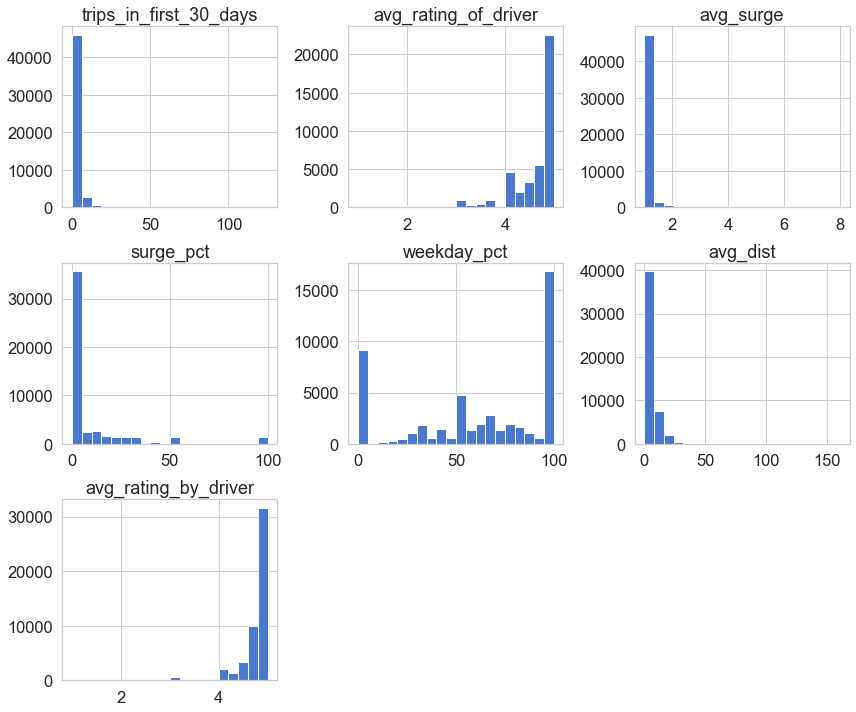

In [32]:
df[num_col].hist(bins=20, figsize=(12, 10))
plt.tight_layout()

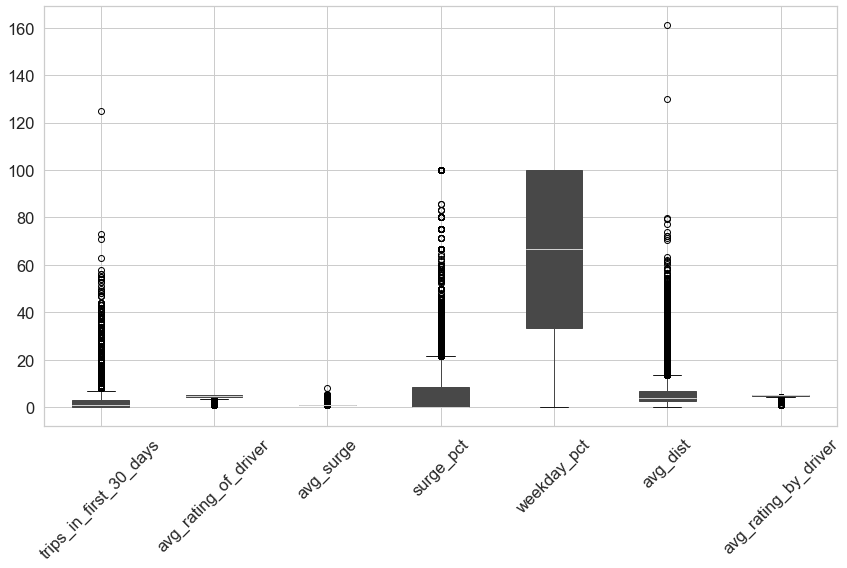

In [33]:
df[num_col].boxplot(figsize=(12, 8),
                    rot=45,
                    patch_artist=True)
plt.tight_layout()

In [34]:
df[num_col].quantile(.95)

trips_in_first_30_days      9.00
avg_rating_of_driver        5.00
avg_surge                   1.38
surge_pct                  50.00
weekday_pct               100.00
avg_dist                   16.78
avg_rating_by_driver        5.00
Name: 0.95, dtype: float64

In [35]:
for col in num_col:
    outlier_frac = len(df[col][df[col] > df[col].quantile(.95)]) / df.shape[0] * 100
    print(f'Column "{col}" has {outlier_frac:.2f}% entries greater than the 95-th percentile')

Column "trips_in_first_30_days" has 4.24% entries greater than the 95-th percentile
Column "avg_rating_of_driver" has 0.00% entries greater than the 95-th percentile
Column "avg_surge" has 4.81% entries greater than the 95-th percentile
Column "surge_pct" has 3.45% entries greater than the 95-th percentile
Column "weekday_pct" has 0.00% entries greater than the 95-th percentile
Column "avg_dist" has 4.99% entries greater than the 95-th percentile
Column "avg_rating_by_driver" has 0.00% entries greater than the 95-th percentile


Several features have outliers, some obvious and some debatable:
  - trips_in_first_30_days: 120 trips in 30 days means 4 trips a day, which seems unlikely to happen. This obvious outlier will be removed. Having about 60 trips in a month is debatable so I will keep this values;
  - avg_dist: I will remove the two outliers above 120, the others are debatable;
  - surge_pct: Apparently some people always used the service during surge time;
  
Given the above considerations I will remove only obvious outliers and choose predictive models which are robust to outliers, e.g. decision trees.  

In [36]:
df.loc[df['trips_in_first_30_days'] > 80, 'trips_in_first_30_days'] = np.nan
df.loc[df['avg_dist'] > 100, 'avg_dist'] = np.nan

### Boolean Columns

In [37]:
bool_col = df.select_dtypes('bool').columns.tolist()
bool_col

['ultimate_black_user']

In [38]:
df[bool_col].value_counts(normalize=True)

ultimate_black_user
False                  0.62292
True                   0.37708
dtype: float64

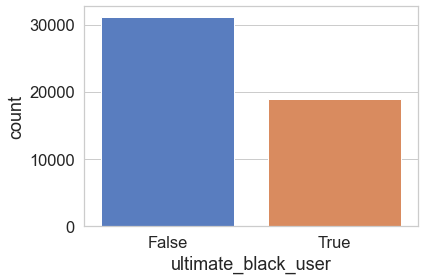

In [39]:
sns.countplot(x='ultimate_black_user', data=df)
plt.tight_layout()

### Categorical Columns

In [40]:
cat_col = df.select_dtypes('object').columns.tolist()
cat_col

['city', 'phone']

In [41]:
df[cat_col].describe()

,city,phone
count,49992,49596
unique,3,2
top,Winterfell,iPhone
freq,23331,34578


In [42]:
for col in cat_col:
    print(f'Columns: {col},\nValue Counts:\n{df[col].value_counts()}\n')

Columns: city,
Value Counts:
Winterfell        23331
Astapor           16531
King's Landing    10130
Name: city, dtype: int64

Columns: phone,
Value Counts:
iPhone     34578
Android    15018
Name: phone, dtype: int64



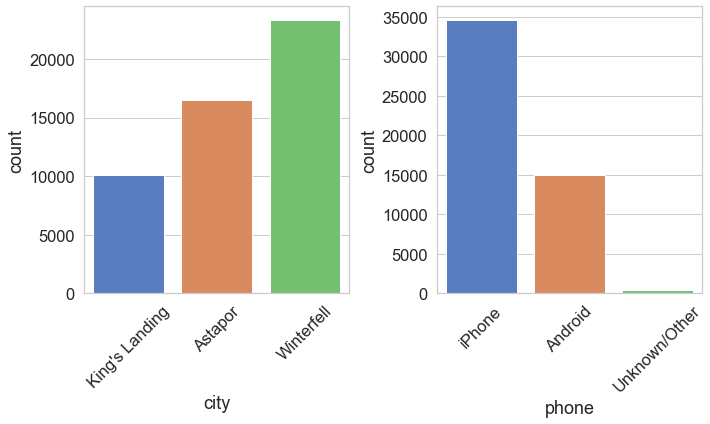

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

sns.countplot(x='city', data=df, ax=ax1)
sns.countplot(x='phone', data=df.fillna('Unknown/Other'), ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()

Low cardinality and decently balanced classes (Unknown/Other class is nan, which we'll impute later in the pipeline) - no need for modification at this stage. Encoding will be necessary for ML model.

# EDA

## Numerical Columns

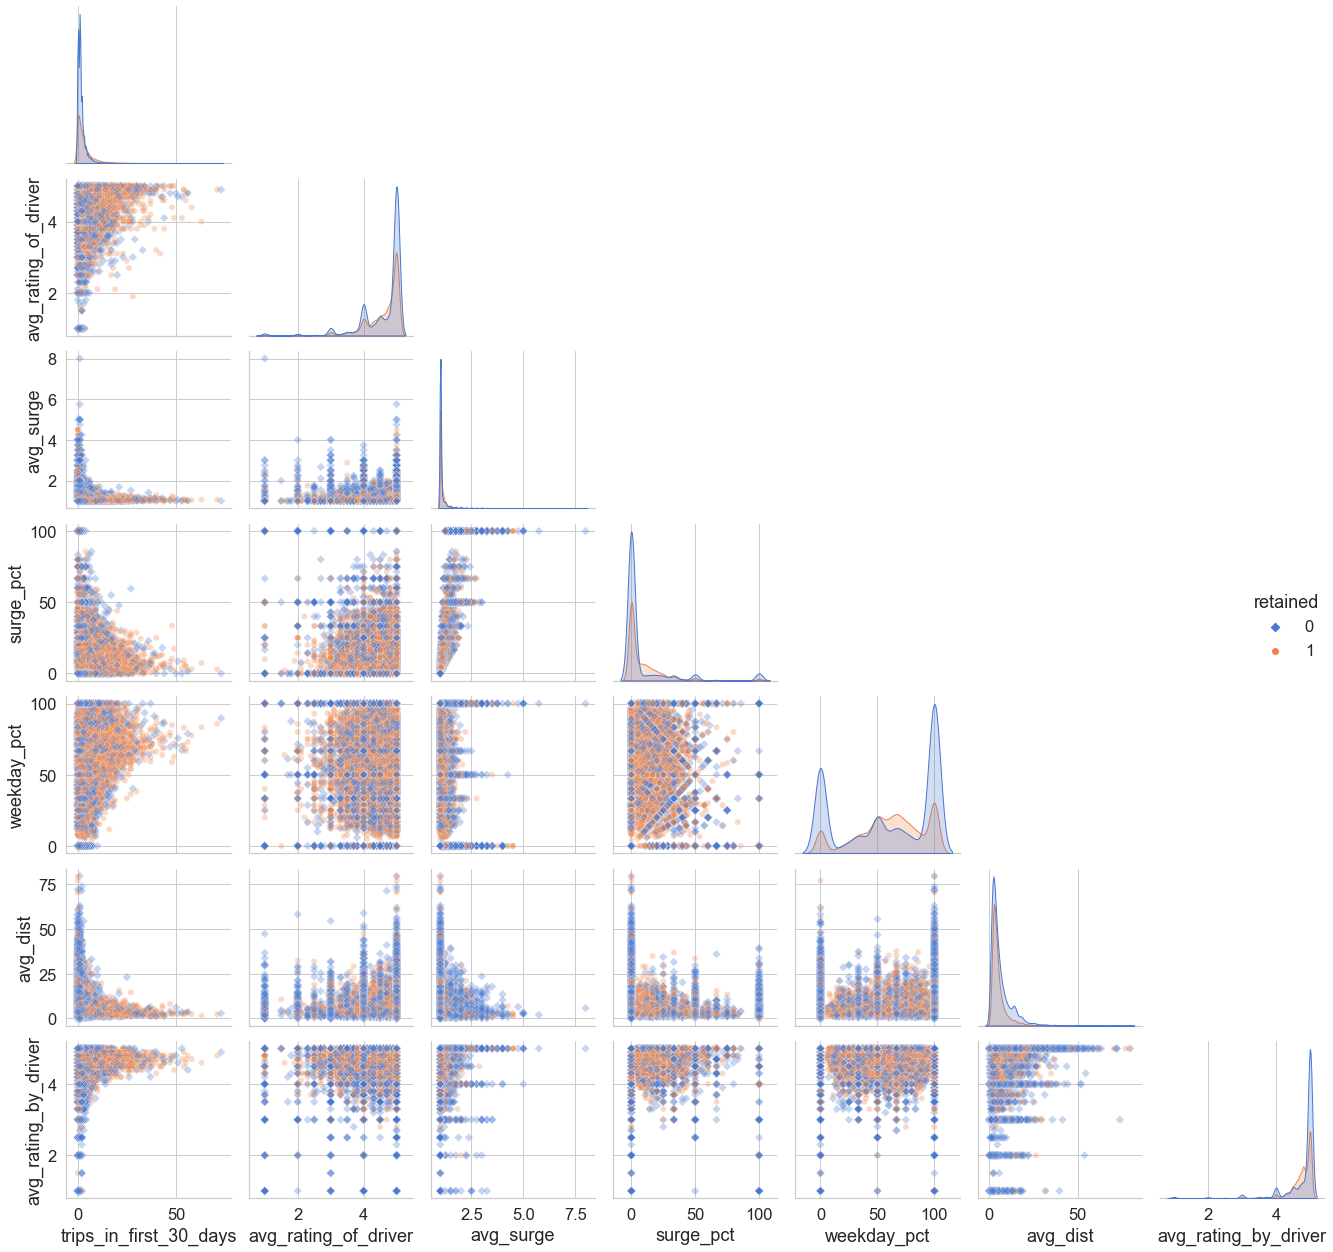

In [44]:
sns.pairplot(data=df[num_col+['retained']],
             hue='retained',
             diag_kind='kde',
             corner=True,
             markers=['D','o'],
             plot_kws={'alpha':0.3})
plt.tight_layout()

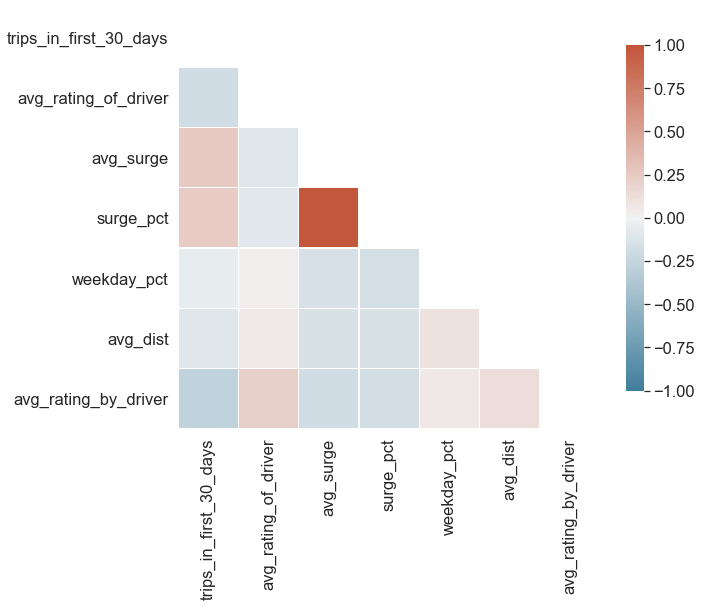

In [45]:
# Correlation
corr_matrix = df[num_col].corr('spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.tight_layout()

surge_pct and avg_surge are correlated. Either drop one of the two or use models robust to multicollinearity.

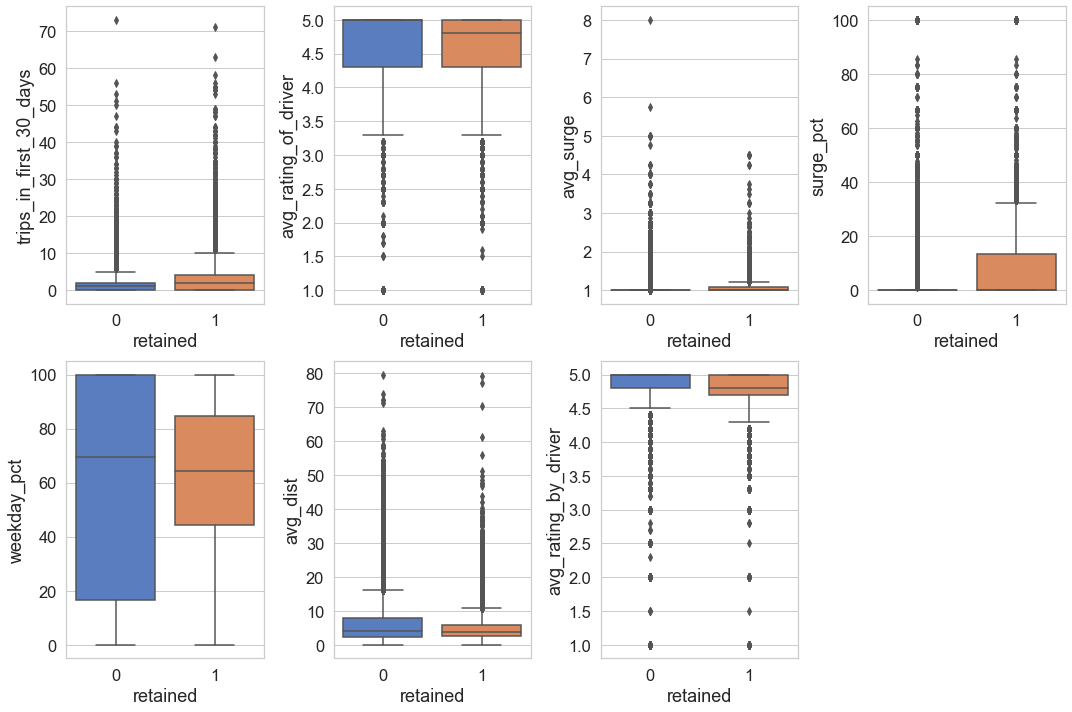

In [46]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for col, ax in zip(num_col, axes.flatten()):
    sns.boxplot(data=df,
                y=col, 
                x='retained',
                orient='v', 
                ax=ax)

axes.flat[-1].set_visible(False)
plt.subplots_adjust(wspace=2.5)
plt.tight_layout()

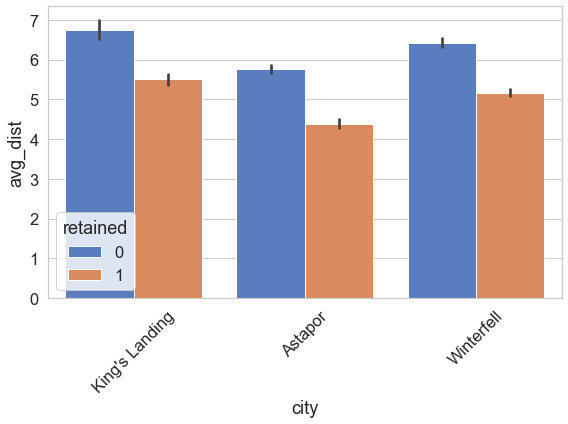

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,
            x='city', 
            y='avg_dist',
            hue='retained')
plt.xticks(rotation=45)
plt.tight_layout()

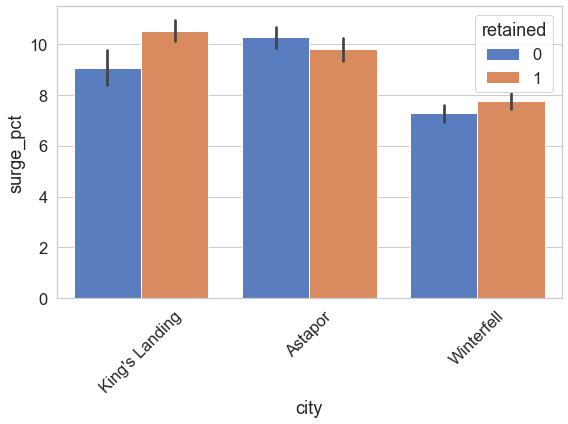

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,
            x='city', 
            y='surge_pct',
            hue='retained')
plt.xticks(rotation=45)
plt.tight_layout()

<Figure size 576x432 with 0 Axes>

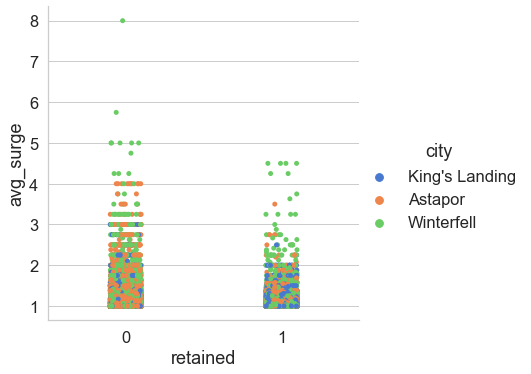

In [49]:
plt.figure(figsize=(8,6))
sns.catplot(data=df,
            hue='city', 
            y='avg_surge',
            x='retained',
            legend_out=True);

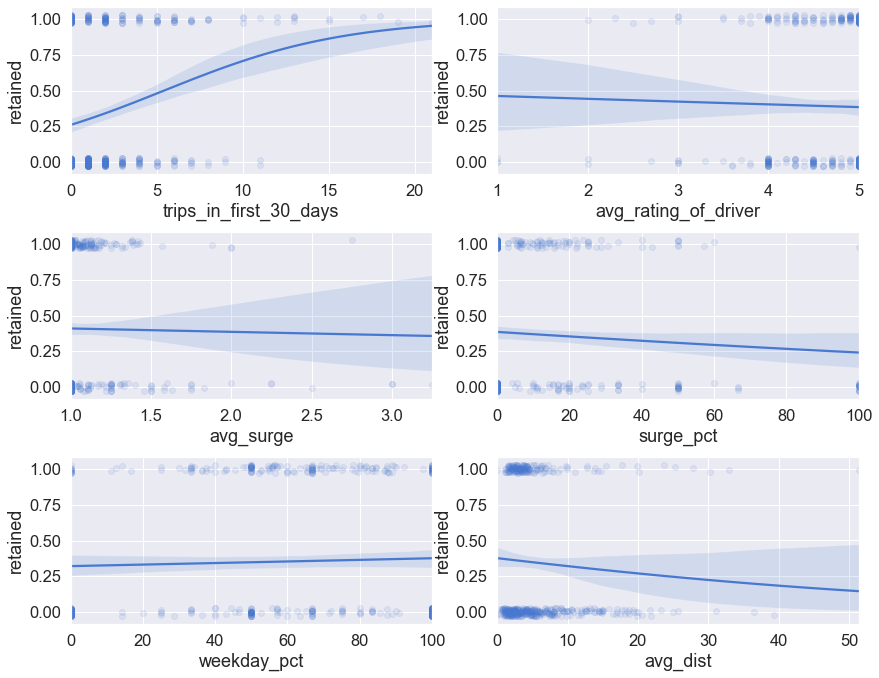

In [50]:
import random
random.seed = 42

df['retained'] = df['retained'].astype('float')

sns.set_style('darkgrid')
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
for col, ax in zip(num_col, axes.flatten()):
    sns.regplot(data=df[num_col+['retained']].sample(frac=0.01),
                x=col,
                y='retained',
                logistic=True, 
                n_boot=500, 
                y_jitter=.03,
                ax=ax,
                scatter_kws={'alpha':0.1})
axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)
plt.subplots_adjust(hspace=1.5, wspace=0.5)
plt.tight_layout()

### Categorical and Boolean Columns

In [51]:
cols = cat_col + bool_col
cols

['city', 'phone', 'ultimate_black_user']

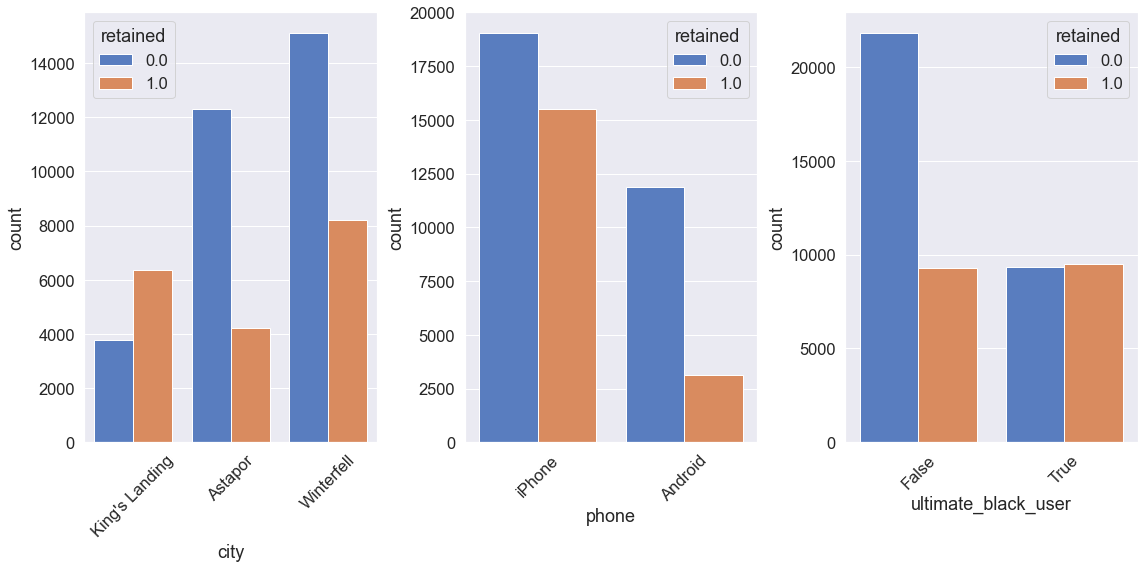

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for col, ax in zip(cols, axes.flatten()):
    sns.countplot(data=df,
                  x=col, 
                  hue='retained', 
                  ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.tight_layout()

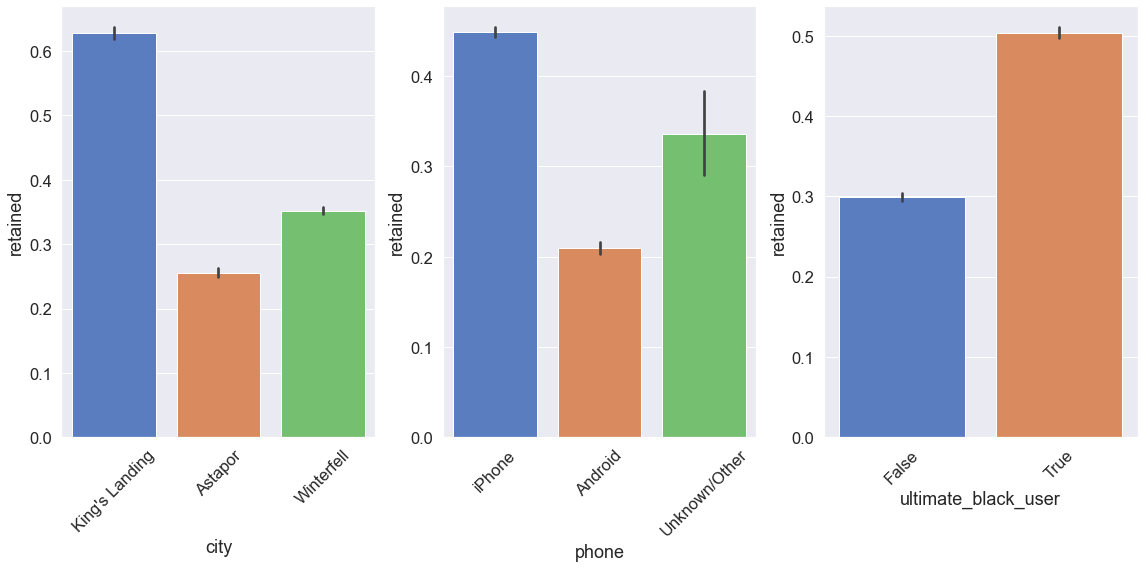

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for col, ax in zip(cols, axes.flatten()):
    
    sns.barplot(data=df.fillna('Unknown/Other'),
                x=col, 
                y='retained',
                ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

In [54]:
from scipy.stats import chi2_contingency

for col in cols:
    ct_df = pd.crosstab(df[col], df['retained'])
    chi2, pval, dof, ex = chi2_contingency(ct_df, correction=False)
    print(f'Column: {col}, Chi2: {chi2:.2f}, p-value: {pval:.2E}')

Column: city, Chi2: 3819.96, p-value: 0.00E+00
Column: phone, Chi2: 2558.60, p-value: 0.00E+00
Column: ultimate_black_user, Chi2: 2101.48, p-value: 0.00E+00


### Key Findings and Insights

* \~38% of riders was retained
* King's Landing has high retention (\~63%), Astapor the lowest (\~26%)
* In King's Landing retained riders have on average higher surge_pct
* iPhone users more likely to be active (\~45% retention) then Android users (\~21%) 
* Ultimate Black users more likely to be retained (\~50% vs \~30%)
* Winterfell experiences highest avg_surge
* Users having several trips in the first 30 days are more likely to retain
* In all cities, on average, retained riders commute shorter avg_dist than inactive riders.

# Feature Engineering and Modeling

In [55]:
# Extract features from signup_date
df['signup_day'] = df['signup_date'].dt.dayofweek
df['signup_day_is_weekend'] = np.where((df['signup_day'] == 5)
                                      | (df['signup_day'] == 6), 1, 0)

df[['signup_day', 'signup_day_is_weekend']]

,signup_day,signup_day_is_weekend
0,5,1
1,2,0
2,0,0
3,4,0
4,0,0
...,...,...
49995,5,1
49996,4,0
49997,4,0
49998,1,0


#### Create extra features

In [56]:
# remainder of nan
df.isnull().sum()

city                         0
trips_in_first_30_days       1
signup_date                  0
avg_rating_of_driver      8119
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     2
avg_rating_by_driver       201
retained                     0
signup_day                   0
signup_day_is_weekend        0
dtype: int64

In [57]:
df['driver_rider_rating_interaction'] = df['avg_rating_by_driver'] * df['avg_rating_of_driver']
df['total_distance_in_first_30_days'] = df['avg_dist'] * df['trips_in_first_30_days']
df['ave_rating_of_driver_per_avg_surge'] = df['avg_rating_of_driver'] / df['avg_surge']
df['ave_rating_by_driver_per_avg_surge'] = df['avg_rating_by_driver'] / df['avg_surge']

In [58]:
# Prepare list of numerical and categorical / boolean columns to feed column transformer in pipeline

In [59]:
num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]', 'bool']).columns.tolist()
num_col.remove('retained')
num_col

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'signup_day',
 'signup_day_is_weekend',
 'driver_rider_rating_interaction',
 'total_distance_in_first_30_days',
 'ave_rating_of_driver_per_avg_surge',
 'ave_rating_by_driver_per_avg_surge']

In [60]:
# Drop unecessary columns
df.drop(['signup_date'], axis=1, inplace=True)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [62]:
# Store features in X and target in y
X = df.drop('retained', axis=1)
y = df['retained']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37494, 16)
(12498, 16)
(37494,)
(12498,)


In [63]:
y_train.mean(), y_test.mean()

(0.3761401824291887, 0.3761401824291887)

In [64]:
# Adjust target dtype
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [65]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cols)
    ])

### Baseline Model 

Given the class imbalance, we will focus on Precision-Recall AUC and f1-score.
For a dummy classifier Precision-Recall AUC is $0.5$, while f1-score is $2 \times (1 \times 0.376)/(1 + 0.376)$, where $0.376$ is the minority class prior probability. Let's confirm I did the math right with a dummy classifier.

In [66]:
f1_analytical = 2*(1*.376) / (1 + .376)
np.round(f1_analytical, 4)

0.5465

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve

X_tr = preprocessor.fit_transform(X)
dummy_model = DummyClassifier(strategy='constant', constant=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
f1_scores = cross_val_score(dummy_model, X_tr, y, scoring='f1', cv=cv, n_jobs=-1)

    
print(f'The baseline model predicting the Minority Class has f1-score of: {np.round(np.mean(f1_scores), 4)}')

The baseline model predicting the Minority Class has f1-score of: 0.5467


Alright, I will aim to improve a f1-score of 0.55 and a PR AUC of 0.50.

### XGBoost Model

In [68]:
# Define model
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric='logloss', 
                            use_label_encoder =False,
                            n_jobs=-1,
                            verbosity=0)

In [69]:
#  Make pipeline with preprocessing and model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb_clf)
                              ])

In [70]:
from IPython.core.display import display, HTML
from sklearn import set_config 
from sklearn.utils import estimator_html_repr 

set_config(display='diagram')
display(HTML(estimator_html_repr(pipeline_xgb)))

In [71]:
from collections import Counter

# Estimate scale_pos_weight value
counter = Counter(y)
estimate = counter[0] / counter[1]
print('Estimated scale_pos_weight: %.3f' % estimate)

Estimated scale_pos_weight: 1.659


In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters for Randomized search
parameters ={'preprocessor__num__strategy': ['mean', 'median'],
             'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
             'classifier__learning_rate': [0.1, 0.3, 0.5],
             'classifier__max_depth': range(1, 12, 1),
             'classifier__subsample': [0.8, 1],
             'classifier__min_child_weight': [0.5, 1, 3],
             'classifier__n_estimators': [50, 100, 300, 500],
             'classifier__scale_pos_weight': [1, 1.7, 2]}

# Randomized search
search_xgb = RandomizedSearchCV(estimator=pipeline_xgb, 
                                param_distributions=parameters,
                                n_iter=60,
                                cv=5,
                                scoring='f1',
                                return_train_score=True,
                                random_state=42,
                                verbose=3)

# Preprocessing of training data, fit model 
search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=4, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=2, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.821, test=0.712) total time=   2.2s
[CV 2/5] END classifier__learning_rate=0.5, classifier__max_depth=4, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=2, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.818, test=0.696) total time=   2.1s
[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=4, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=2, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.823, 

[CV 2/5] END classifier__learning_rate=0.3, classifier__max_depth=11, classifier__min_child_weight=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.946, test=0.683) total time=   2.8s
[CV 3/5] END classifier__learning_rate=0.3, classifier__max_depth=11, classifier__min_child_weight=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.947, test=0.682) total time=   2.7s
[CV 4/5] END classifier__learning_rate=0.3, classifier__max_depth=11, classifier__min_child_weight=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.940, test=0.677) total time=   2.7s
[CV 5/5

[CV 3/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.789, test=0.713) total time=   3.4s
[CV 4/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.790, test=0.706) total time=   3.3s
[CV 5/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.793, test=0.705) total time=   3.4s
[CV 1/5] END cla

[CV 3/5] END classifier__learning_rate=0.3, classifier__max_depth=7, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.954, test=0.687) total time=   5.0s
[CV 4/5] END classifier__learning_rate=0.3, classifier__max_depth=7, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.953, test=0.692) total time=   4.9s
[CV 5/5] END classifier__learning_rate=0.3, classifier__max_depth=7, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.958, test=0.693) total time=   4.9s
[CV 1/5] END classi

[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=1, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.719, test=0.722) total time=   1.0s
[CV 4/5] END classifier__learning_rate=0.5, classifier__max_depth=1, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.722, test=0.713) total time=   0.9s
[CV 5/5] END classifier__learning_rate=0.5, classifier__max_depth=1, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.722, test=0.713) total time=   1.0s
[CV 1/5] E

[CV 4/5] END classifier__learning_rate=0.1, classifier__max_depth=8, classifier__min_child_weight=0.5, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.807, test=0.706) total time=   1.9s
[CV 5/5] END classifier__learning_rate=0.1, classifier__max_depth=8, classifier__min_child_weight=0.5, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.813, test=0.700) total time=   2.0s
[CV 1/5] END classifier__learning_rate=0.1, classifier__max_depth=10, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.971, test=0.706) total time=   7.6s
[CV 2/5] END classifie

[CV 5/5] END classifier__learning_rate=0.1, classifier__max_depth=11, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.907, test=0.685) total time=   3.0s
[CV 1/5] END classifier__learning_rate=0.3, classifier__max_depth=6, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.900, test=0.690) total time=   4.4s
[CV 2/5] END classifier__learning_rate=0.3, classifier__max_depth=6, classifier__min_child_weight=0.5, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.903, test=0.687) total time=   4.2s
[CV 3/5] END classifi

[CV 1/5] END classifier__learning_rate=0.3, classifier__max_depth=2, classifier__min_child_weight=1, classifier__n_estimators=50, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.699, test=0.710) total time=   0.4s
[CV 2/5] END classifier__learning_rate=0.3, classifier__max_depth=2, classifier__min_child_weight=1, classifier__n_estimators=50, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.706, test=0.701) total time=   0.4s
[CV 3/5] END classifier__learning_rate=0.3, classifier__max_depth=2, classifier__min_child_weight=1, classifier__n_estimators=50, classifier__scale_pos_weight=1, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.705, test=0.700) total time=   0.4s
[CV 4/5] END classifier__

[CV 2/5] END classifier__learning_rate=0.5, classifier__max_depth=8, classifier__min_child_weight=0.5, classifier__n_estimators=500, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.999, test=0.671) total time=   9.9s
[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=8, classifier__min_child_weight=0.5, classifier__n_estimators=500, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=1.000, test=0.675) total time=   9.8s
[CV 4/5] END classifier__learning_rate=0.5, classifier__max_depth=8, classifier__min_child_weight=0.5, classifier__n_estimators=500, classifier__scale_pos_weight=1.7, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=1.000, test=0.663) total time=  10.4

[CV 2/5] END classifier__learning_rate=0.3, classifier__max_depth=9, classifier__min_child_weight=0.5, classifier__n_estimators=50, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.890, test=0.703) total time=   1.2s
[CV 3/5] END classifier__learning_rate=0.3, classifier__max_depth=9, classifier__min_child_weight=0.5, classifier__n_estimators=50, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.887, test=0.706) total time=   1.2s
[CV 4/5] END classifier__learning_rate=0.3, classifier__max_depth=9, classifier__min_child_weight=0.5, classifier__n_estimators=50, classifier__scale_pos_weight=1.7, classifier__subsample=1, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.884, test=0.703) total time=   1.3s
[CV 5/5] END classifier__lea

[CV 3/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.810, test=0.701) total time=   4.3s
[CV 4/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.810, test=0.701) total time=   4.3s
[CV 5/5] END classifier__learning_rate=0.1, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=300, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.809, test=0.707) total time=   4.3s
[CV 1/5] E

[CV 4/5] END classifier__learning_rate=0.3, classifier__max_depth=3, classifier__min_child_weight=1, classifier__n_estimators=50, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.712, test=0.706) total time=   0.6s
[CV 5/5] END classifier__learning_rate=0.3, classifier__max_depth=3, classifier__min_child_weight=1, classifier__n_estimators=50, classifier__scale_pos_weight=1, classifier__subsample=0.8, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.714, test=0.696) total time=   0.6s
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=50, classifier__scale_pos_weight=2, classifier__subsample=1, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.796, test=0.718) total time=   0.8s
[CV 2/5] END classifier__

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['trips_in_first_30_days',
                                                                                'avg_rating_of_driver',
                                                                                'avg_surge',
                                                                                'surge_pct',
                                                                                'weekday_pct',
                                                                                'avg_dist',
                                                                                'avg_rating_by_driver',
                                                                                'signup_day',
                                                                                'signup_day_is_weekend',
                                                                                'driver_rider_rating_interaction',
                                                                                'total_distance_in_f...
                                        'classifier__max_depth': range(1, 12),
                                        'classifier__min_child_weight': [0.5, 1,
                                                                         3],
                                        'classifier__n_estimators': [50, 100,
                                                                     300, 500],
                                        'classifier__scale_pos_weight': [1, 1.7,
                                                                         2],
                                        'classifier__subsample': [0.8, 1],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__num__strategy': ['mean',
                                                                        'median']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=3)

In [73]:
# Optimized model
opt_xgb_clf = search_xgb.best_estimator_
search_xgb.best_params_

{'preprocessor__num__strategy': 'median',
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'classifier__subsample': 1,
 'classifier__scale_pos_weight': 1.7,
 'classifier__n_estimators': 300,
 'classifier__min_child_weight': 1,
 'classifier__max_depth': 4,
 'classifier__learning_rate': 0.1}

In [74]:
# Predictions
y_pred_train_xgb = opt_xgb_clf.predict(X_train)
y_pred_test_xgb = opt_xgb_clf.predict(X_test)
y_pred_proba_train_xgb = opt_xgb_clf.predict_proba(X_train)
y_pred_proba_test_xgb = opt_xgb_clf.predict_proba(X_test)

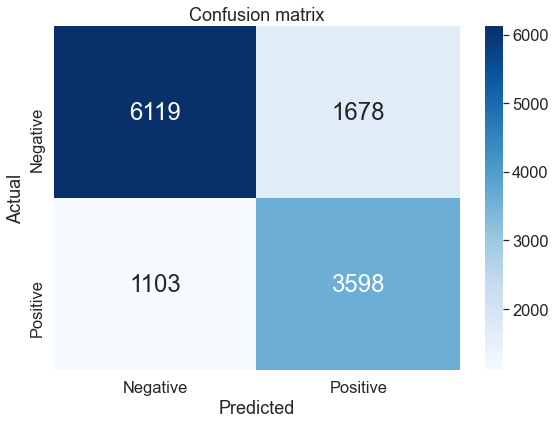

In [75]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test_xgb)
lables = {0:'Negative', 1:'Positive'} 

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            annot_kws={'size':24},
            fmt="d",
            xticklabels=lables.values(), 
            yticklabels=lables.values(),
            cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [76]:
# classification report
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      7797
           1       0.68      0.77      0.72      4701

    accuracy                           0.78     12498
   macro avg       0.76      0.78      0.77     12498
weighted avg       0.79      0.78      0.78     12498



In [77]:
# Precision-recall curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_pred_proba_test_xgb[:,1])
pr_auc_test_xgb = auc(recall_xgb, precision_xgb)
fscore_xgb = (2 * precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
opt_fscore_xgb_index = np.argmax(fscore_xgb) 
threshold_xgb_opt = round(thresholds_xgb[opt_fscore_xgb_index], 2)
fscore_xgb_opt = round(fscore_xgb[opt_fscore_xgb_index], 2)
recall_xgb_opt = round(recall_xgb[opt_fscore_xgb_index], 2)
precision_xgb_opt = round(precision_xgb[opt_fscore_xgb_index], 2)

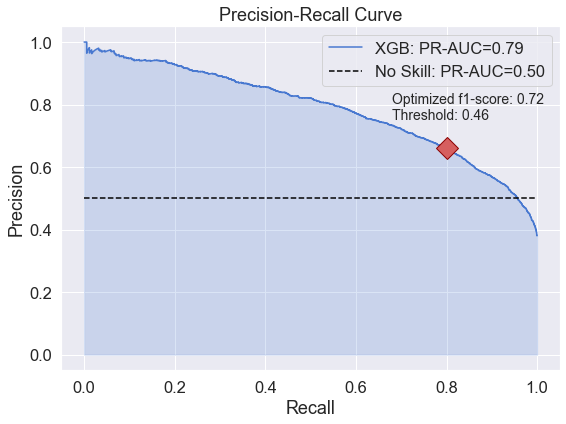

In [95]:
plt.figure(figsize=(8,6))
plt.plot(recall_xgb, precision_xgb,  label='XGB: PR-AUC={:.2f}'.format(pr_auc_test_xgb))
plt.plot([0, 1], [0.5, .5], '--', color = 'black', label='No Skill: PR-AUC=0.50')
plt.plot(recall_xgb_opt, precision_xgb_opt, marker='D', markersize=16, color='r', markeredgecolor='darkred')
plt.annotate('Optimized f1-score: {:.2f}\nThreshold: {:.2f}\n '
             .format(fscore_xgb_opt, round(threshold_xgb_opt, 2)), 
             xy=(.68, .7), fontsize=14)
plt.fill_between(recall_xgb, precision_xgb, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Precision-Recall Curve')
plt.tight_layout()

In [79]:
# ROC_AUC evaluation
roc_auc_train_xgb = round(roc_auc_score(y_train, y_pred_proba_train_xgb[:, 1]), 2)
roc_auc_test_xgb = round(roc_auc_score(y_test, y_pred_proba_test_xgb[:, 1]), 2)
print('Train Set ROC AUC:', roc_auc_train_xgb) 
print('Test Set ROC AUC:', roc_auc_test_xgb)

Train Set ROC AUC: 0.88
Test Set ROC AUC: 0.86


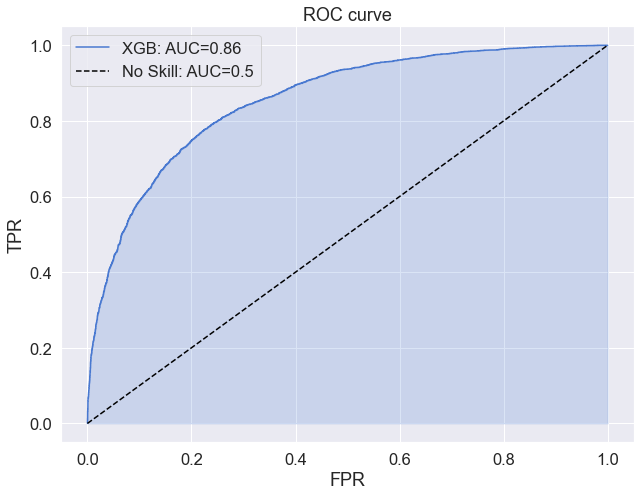

In [80]:
# plot ROC_AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_test_xgb[:,1])

plt.figure(figsize=(9,7))
plt.plot(fpr_xgb, tpr_xgb, label='XGB: AUC={}'.format(roc_auc_test_xgb))
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.2, color='b')
plt.plot([0,1], [0,1], '--', color = 'black', label='No Skill: AUC=0.5')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=2)
plt.title('ROC curve')
plt.tight_layout()

### XGB Feature Importance

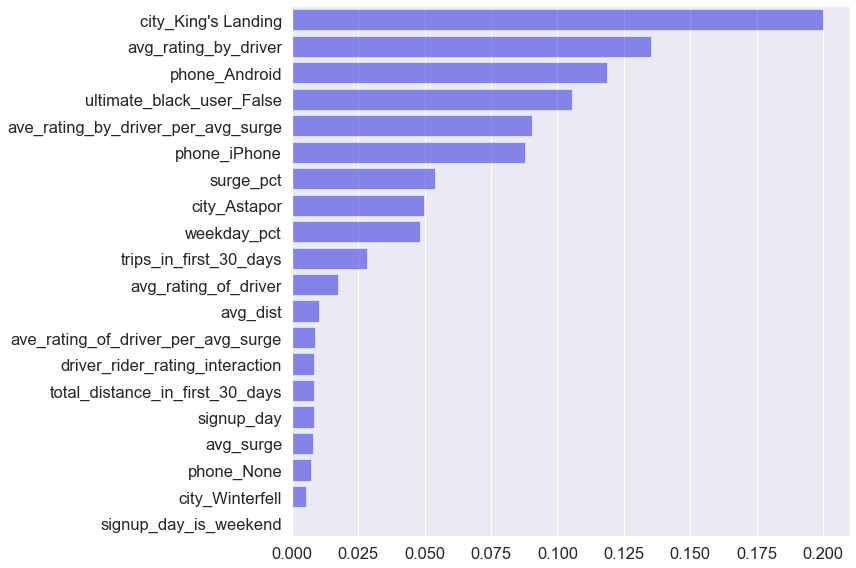

In [81]:
# Preprocess data with best parameters
numerical_transformer_rev = SimpleImputer(strategy=search_xgb.best_params_['preprocessor__num__strategy'])
categorical_transformer_rev = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy=search_xgb.best_params_['preprocessor__cat__imputer__strategy'])),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_rev = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_rev, num_col),
        ('cat', categorical_transformer_rev, cols)
    ])

pipeline_rev = Pipeline(steps=[('preprocessor', preprocessor_rev)])
X_values = preprocessor_rev.fit_transform(X_train, y_train)
onehot_col = pipeline_rev.named_steps['preprocessor'] \
             .named_transformers_['cat'] \
             .named_steps['onehot'] \
             .get_feature_names(input_features=cols)
columns_tot = num_col + onehot_col.tolist()

feature_importance = pd.Series(data=opt_xgb_clf.named_steps['classifier'].feature_importances_,
                               index = np.array(columns_tot)).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance.index[:20], 
            x=feature_importance.values[:20],
            color='blue',
            alpha=.5,
            orient='h')
plt.tight_layout()

### LightGBM Model

In [82]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Define model
lgbm_clf = LGBMClassifier(objective='binary', 
                          random_state = 42)

# Make pipeline with preprocessing and model
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', lgbm_clf)
                               ])

# Randomized search
parameters ={'preprocessor__num__strategy': ['mean', 'median'],
             'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
             'classifier__learning_rate': [0.1, 0.3, 0.5],
             'classifier__max_depth': [-1, 1, 2, 3, 4, 5, 8, 10],
             'classifier__bagging_fraction': [0.7, 1.0],
             'classifier__num_leaves': range(20,60,10),
             'classifier__n_estimators': [100, 200, 300]}

search_lgbm = RandomizedSearchCV(estimator=pipeline_lgbm, 
                                 param_distributions=parameters,
                                 n_iter=60,
                                 cv=5,
                                 scoring='f1',
                                 return_train_score=True,
                                 verbose=3)

# Preprocessing of training data, fit model 
search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=1, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.687, test=0.698) total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=1, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.692, test=0.691) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[

[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.838, test=0.702) total time=   0.6s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.845, test=0.697) total time=   0.7s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 3/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=20, preprocessor__cat

[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.715, test=0.710) total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.719, test=0.706) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 3/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__ca

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__n_estimators=200, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.789, test=0.704) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__n_estimators=200, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.793, test=0.698) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__n_estimators=200, classifier__num_leaves=20, prepro

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.3, classifier__max_depth=1, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.691, test=0.699) total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.3, classifier__max_depth=1, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.696, test=0.694) total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.3, classifier__max_depth=1, classifier__n_estimators=200, classifier__num_leaves=30, prepro

[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=300, classifier__num_leaves=50, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.768, test=0.711) total time=   0.6s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=300, classifier__num_leaves=50, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.770, test=0.707) total time=   0.6s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 3/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=300, classifier__num_leaves=50, prepro

[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.952, test=0.675) total time=   0.8s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=median;, score=(train=0.950, test=0.671) total time=   0.8s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 3/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=40, pre

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=50, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.969, test=0.682) total time=   0.9s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=50, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.967, test=0.668) total time=   0.8s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=-1, classifier__n_estimators=300, classifier__num_leaves=50, preprocessor__cat

[CV 1/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=3, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.745, test=0.710) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 2/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=3, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.748, test=0.703) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV 3/5] END classifier__bagging_fraction=1.0, classifier__learning_rate=0.3, classifier__max_depth=3, classifier__n_estimators=300, classifier__num_leaves=40, preprocess

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=8, classifier__n_estimators=300, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.766, test=0.713) total time=   0.7s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=8, classifier__n_estimators=300, classifier__num_leaves=20, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.768, test=0.700) total time=   0.6s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=8, classifier__n_estimators=300, classifier__num_leaves=20, preprocess

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=100, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.716, test=0.711) total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=100, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.718, test=0.704) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=100, classifier__num_leaves=40, preprocessor__ca

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.727, test=0.710) total time=   0.4s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=300, classifier__num_leaves=40, preprocessor__cat__imputer__strategy=most_frequent, preprocessor__num__strategy=mean;, score=(train=0.728, test=0.701) total time=   0.5s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=300, classifier__num_leaves=40, preprocess

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.794, test=0.712) total time=   0.8s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.797, test=0.702) total time=   0.7s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__cat

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.740, test=0.710) total time=   0.5s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=median;, score=(train=0.744, test=0.704) total time=   0.5s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=300, classifier__num_leaves=30, preprocessor__ca

[CV 1/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.749, test=0.711) total time=   0.5s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 2/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__imputer__strategy=constant, preprocessor__num__strategy=mean;, score=(train=0.756, test=0.704) total time=   0.5s
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[CV 3/5] END classifier__bagging_fraction=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__num_leaves=30, preprocessor__cat__i

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['trips_in_first_30_days',
                                                                                'avg_rating_of_driver',
                                                                                'avg_surge',
                                                                                'surge_pct',
                                                                                'weekday_pct',
                                                                                'avg_dist',
                                                                                'avg_rating_by_driver',
                                                                                'signup_day',
                                                                                'signup_day_is_weekend',
                                                                                'driver_rider_rating_interaction',
                                                                                'total_distance_in_f...
                   param_distributions={'classifier__bagging_fraction': [0.7,
                                                                         1.0],
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5],
                                        'classifier__max_depth': [-1, 1, 2, 3,
                                                                  4, 5, 8, 10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__num_leaves': range(20, 60, 10),
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__num__strategy': ['mean',
                                                                        'median']},
                   return_train_score=True, scoring='f1', verbose=3)

In [83]:
# optimized model
opt_lgbm_clf = search_lgbm.best_estimator_
search_lgbm.best_params_

{'preprocessor__num__strategy': 'median',
 'preprocessor__cat__imputer__strategy': 'constant',
 'classifier__num_leaves': 40,
 'classifier__n_estimators': 200,
 'classifier__max_depth': 5,
 'classifier__learning_rate': 0.1,
 'classifier__bagging_fraction': 1.0}

In [84]:
# Predictions
y_pred_train_lgbm = opt_lgbm_clf.predict(X_train)
y_pred_test_lgbm = opt_lgbm_clf.predict(X_test)
y_pred_proba_train_lgbm = opt_lgbm_clf.predict_proba(X_train)
y_pred_proba_test_lgbm = opt_lgbm_clf.predict_proba(X_test)

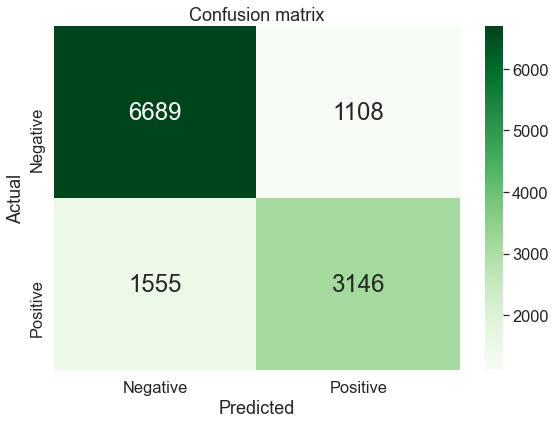

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred_test_lgbm)
lables = {0:'Negative', 1:'Positive'} 

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            annot_kws={'size':24},
            fmt="d",
            xticklabels=lables.values(), 
            yticklabels=lables.values(),
            cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [86]:
# classification report
print(classification_report(y_test, y_pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7797
           1       0.74      0.67      0.70      4701

    accuracy                           0.79     12498
   macro avg       0.78      0.76      0.77     12498
weighted avg       0.78      0.79      0.78     12498



In [87]:
# Precision-recall curve
precision_lgbm, recall_lgbm, thresholds_lgbm = precision_recall_curve(y_test, y_pred_proba_test_lgbm[:,1])
pr_auc_test_lgbm = auc(recall_lgbm, precision_lgbm)
fscore_lgbm = (2 * precision_lgbm * recall_lgbm) / (precision_lgbm + recall_lgbm)
opt_fscore_lgbm_index = np.argmax(fscore_lgbm) 
threshold_lgbm_opt = round(thresholds_lgbm[opt_fscore_lgbm_index], 2)
fscore_lgbm_opt = round(fscore_lgbm[opt_fscore_lgbm_index], 2)
recall_lgbm_opt = round(recall_lgbm[opt_fscore_lgbm_index], 2)
precision_lgbm_opt = round(precision_lgbm[opt_fscore_lgbm_index], 2)

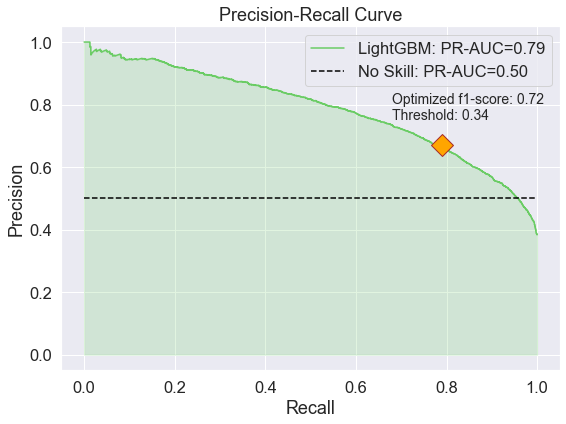

In [94]:
plt.figure(figsize=(8,6))
plt.plot(recall_lgbm, precision_lgbm, label='LightGBM: PR-AUC={:.2f}'.format(pr_auc_test_lgbm), color='g')
plt.plot([0, 1], [0.5, .5], '--', color = 'black', label='No Skill: PR-AUC=0.50')
plt.plot(recall_lgbm_opt, precision_lgbm_opt, marker='D', markersize=16, color='orange', markeredgecolor='brown')
plt.annotate('Optimized f1-score: {:.2f}\nThreshold: {:.2f}\n '
             .format(fscore_lgbm_opt, round(threshold_lgbm_opt, 2)), 
             xy=(.68, .7), fontsize=14)
plt.fill_between(recall_lgbm, precision_lgbm, alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Precision-Recall Curve')
plt.tight_layout()

In [89]:
# ROC_AUC evaluation
roc_auc_train_lgbm = round(roc_auc_score(y_train, y_pred_proba_train_lgbm[:, 1]), 2)
roc_auc_test_lgbm = round(roc_auc_score(y_test, y_pred_proba_test_lgbm[:, 1]), 2)
print('Train Set ROC AUC:', roc_auc_train_lgbm) 
print('Test Set ROC AUC:', roc_auc_test_lgbm)

Train Set ROC AUC: 0.89
Test Set ROC AUC: 0.86


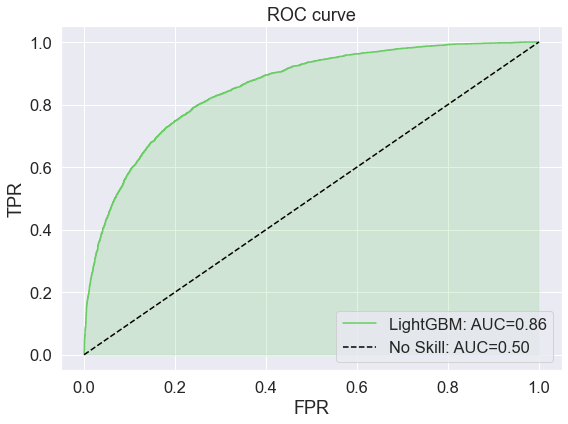

In [90]:
# plot ROC_AUC
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_test_lgbm[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_lgbm, tpr_lgbm, color='g', label='LightGBM: AUC={}'.format(roc_auc_test_lgbm))
plt.fill_between(fpr_lgbm, tpr_lgbm, alpha=0.2, color='g')
plt.plot([0,1], [0,1], '--', color = 'black', label='No Skill: AUC=0.50')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.title('ROC curve')
plt.tight_layout()

### LightGBM Feature Importance

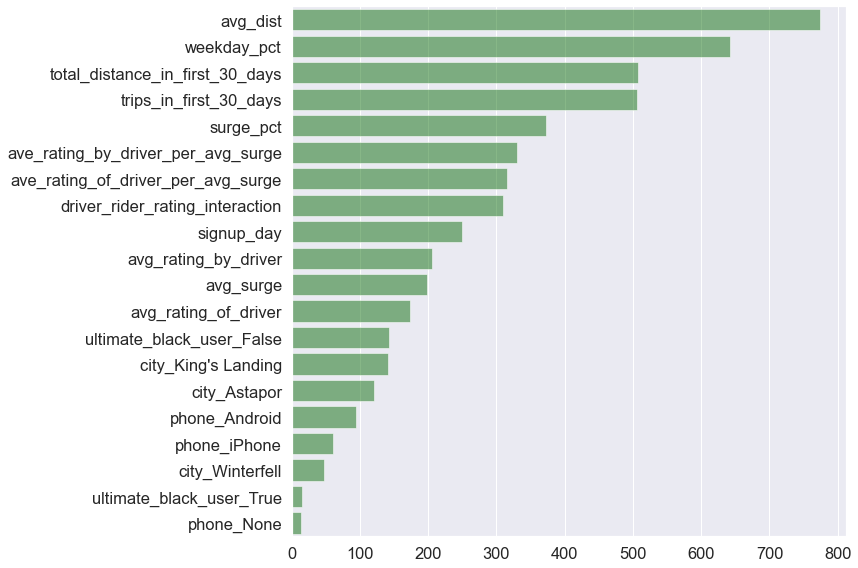

In [91]:
# Preprocess data with best parameters
numerical_transformer_rev = SimpleImputer(strategy=search_lgbm.best_params_['preprocessor__num__strategy'])
categorical_transformer_rev = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy=search_lgbm.best_params_['preprocessor__cat__imputer__strategy'])),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_rev = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_rev, num_col),
        ('cat', categorical_transformer_rev, cols)
    ])

pipeline_rev = Pipeline(steps=[('preprocessor', preprocessor_rev)])
X_values = preprocessor_rev.fit_transform(X_train, y_train)
onehot_col = pipeline_rev.named_steps['preprocessor'] \
             .named_transformers_['cat'] \
             .named_steps['onehot'] \
             .get_feature_names(input_features=cols)
columns_tot = num_col + onehot_col.tolist()

feature_importance = pd.Series(data=opt_lgbm_clf.named_steps['classifier'].feature_importances_,
                               index = np.array(columns_tot)).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance.index[:20], 
            x=feature_importance.values[:20],
            color='green',
            alpha=.5,
            orient='h')
plt.tight_layout()

### Models Comparison

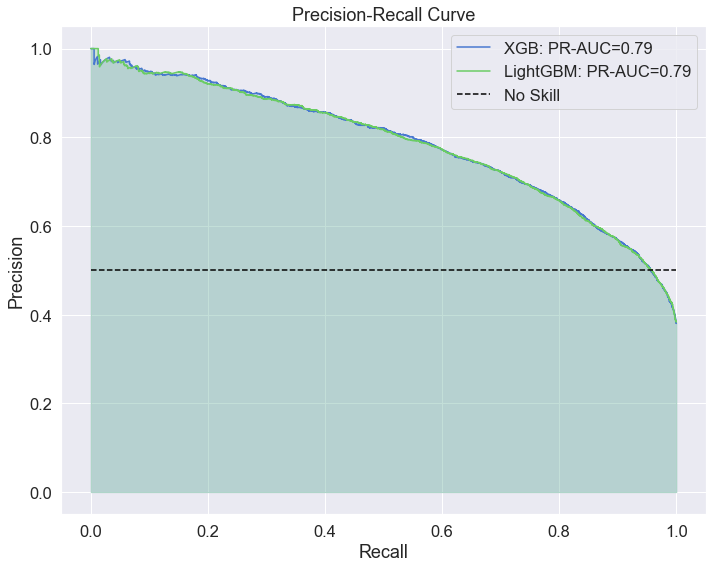

In [98]:
plt.figure(figsize=(10,8))
plt.plot(recall_xgb, precision_xgb,  label='XGB: PR-AUC={:.2f}'.format(pr_auc_test_xgb), color='b')
plt.plot(recall_lgbm, precision_lgbm,  label='LightGBM: PR-AUC={:.2f}'.format(pr_auc_test_lgbm), color='g')
plt.plot([0, 1], [0.5, .5], '--', color = 'black', label='No Skill')
plt.fill_between(recall_xgb, precision_xgb, alpha=0.2, color='b')
plt.fill_between(recall_lgbm, precision_lgbm, alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Precision-Recall Curve')
plt.tight_layout()

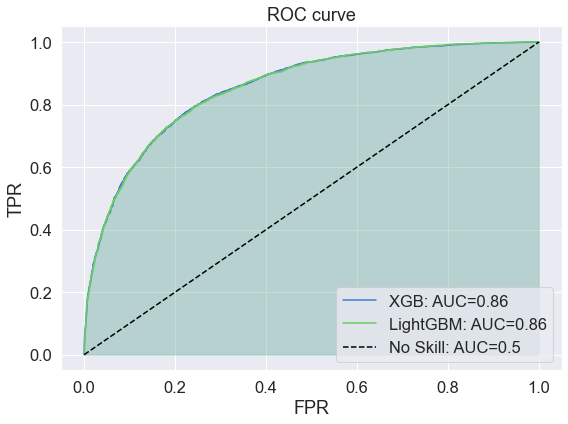

In [93]:
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, color='b', label='XGB: AUC={}'.format(roc_auc_test_xgb))
plt.plot(fpr_lgbm, tpr_lgbm, color='g', label='LightGBM: AUC={}'.format(roc_auc_test_lgbm))
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.2, color='b')
plt.fill_between(fpr_lgbm, tpr_lgbm, alpha=0.2, color='g')
plt.plot([0,1], [0,1], '--', color = 'black', label='No Skill: AUC=0.5')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.title('ROC curve')
plt.tight_layout()

# Conclusions

The XGBoost and LightGBM models offer similar performance. Looking at precision and recall metrics, which are particularly interesting in view of the business problem, we see that both models provide decent performance. In fact, the LightGMB model has recall of 86% (78% for XGB) on the inactive users and 67% (77% for XGB) of retained (active). This implies a f1-score of about 83% for the inactive riders in the LightGBM model (81% for the XGB model) and 70% for the retained riders (72% for the XGB model).

The difference in performance is mainly due to the class imbalance of the dataset. However, the LightGBM model turns out to be very useful in predicting potential inactive users (high recall), hence Ultimate Technologies could use this tool to identify customers which are likely to be inactive in the near future and come up with strategies to incentivize this group to remain active by improving their experience. Furthermore, the company could focus on the most predictive features and run design experiments to improve increase the overall retention rate, e.g. by performing A/B testing and hypothesis testing.

The results are satisfying, especially given the modest amount of data considered. Further improvement could be achieved by increasing the data. A stratified solution, e.g. developing different models for user from different cities or using different phones could be tested to see if we gain better performance. Another option to boost the performance is to use a stacked model, but with the downside of reducing interpretability.